In [17]:
#Supress Warnings
from warnings import filterwarnings
filterwarnings('ignore')

#'OS' module provides functions for interacting with the operating system
import os

#Pandas is used for data manipulation and analysis
import pandas as pd

#'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

#'Matplotlib' is a data visualization library used for 2d and 3d plots, built on numpy
import matplotlib.pyplot as plt

#'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

In [18]:
#set my working directory
os.chdir(r'C:\Users\hp\Downloads')
os.getcwd()

'C:\\Users\\hp\\Downloads'

In [19]:
#Read the dataset
df_insurance = pd.read_csv('healthinsurance.csv')

#check if the data properly loaded into the dataframe
df_insurance.head()


,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [20]:
#Check the dimension
df_insurance.shape

(15000, 13)

In [21]:
#Check the datatypes
df_insurance.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

In [22]:
# use .astype() to change the data type
# convert numerical variables to categorical  

# convert numeric variable 'smoker' to object (categorical) variable
df_insurance.smoker = df_insurance.smoker.astype('object')

# convert numeric variable 'diabetes' to object (categorical) variable
df_insurance.diabetes = df_insurance.diabetes.astype('object')

# convert 'regular_ex' variable diabetes to object (categorical) variable
df_insurance.regular_ex = df_insurance.regular_ex.astype('object')

In [23]:
#Check the datatypes
df_insurance.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                  object
city                    object
bloodpressure            int64
diabetes                object
regular_ex              object
job_title               object
claim                  float64
dtype: object

In [24]:
#Let us see the summary statistics
df_insurance.describe()#This will show only numeric variables

,age,weight,bmi,no_of_dependents,bloodpressure,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,68.650133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,19.418515,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,64.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,71.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,80.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,122.000000,63770.400000


In [25]:
#Let us see the summary statistics of categorical variables
df_insurance.describe(include=object)#But this will show only categorical variables

,sex,hereditary_diseases,smoker,city,diabetes,regular_ex,job_title
count,15000,15000,15000,15000,15000,15000,15000
unique,2,10,2,91,2,2,35
top,female,NoDisease,0,NewOrleans,1,0,Student
freq,7652,13998,12028,302,11655,11638,1320


In [26]:
# obtain the total missing values for each variable
# 'isnull().sum()' returns the number of missing values in each variable
# sort the variables on the basis of total null values in the variable using sort_values()
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_insurance.isnull().sum().sort_values(ascending=False) 
# 'isnull().sum()' returns the number of missing values in each variable
# 'isnull().count()' returns the count of the data, i.e. count of outcomes 'True' and 'False' of isnull() 
# sort the variables on the basis of total null values in the variable using sort_values()
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_insurance.isnull().sum()*100/df_insurance.isnull().count()).sort_values(ascending=False)
# concat the 'Total' and 'Percent' columns using 'concat' function
# keys:pass a list of column names in parameter  
# axis = 1: concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
# print the missing data
missing_data

,Total,Percentage of Missing Values
bmi,956,6.373333
age,396,2.640000
claim,0,0.000000
job_title,0,0.000000
regular_ex,0,0.000000
diabetes,0,0.000000
bloodpressure,0,0.000000
city,0,0.000000
smoker,0,0.000000
no_of_dependents,0,0.000000


# Data bias is where certain data is included or excluded for model building purpose with or without intent. And it has serious consequences.

In [27]:
# check the average age for male and female
# group the age by sex using 'groupby'
# 'axis = 0' splits along rows
# mean(): returns the mean age for each sex
df_insurance['age'].groupby(df_insurance['sex'], axis=0).mean()

sex
female    39.361040
male      39.738395
Name: age, dtype: float64

In [28]:
# fill the missing values with the mean value of 'age' using 'fillna()'
# mean(): returns the mean age
# inplace: makes permanent changes in the dataframe
df_insurance['age'].fillna(df_insurance['age'].mean(), inplace=True)

In [29]:
# fill the missing values with the mean value of 'bmi' using 'fillna()'
# mean(): returns the mean bmi
# inplace: makes permanent changes in the dataframe
df_insurance['bmi'].fillna(df_insurance['bmi'].mean(), inplace=True)

In [30]:
# calculate the median of the bloodpressure using 'median()''
median_bloodpressure = df_insurance['bloodpressure'].median()

# replace zero values by median using 'replace()'
df_insurance['bloodpressure'] = df_insurance['bloodpressure'].replace(0,median_bloodpressure) 


In [31]:
# Select the numeric variables
# select_dtypes(include = np.number)
df_numeric_features = df_insurance.select_dtypes(include = np.number)
df_numeric_features.columns

Index(['age', 'weight', 'bmi', 'no_of_dependents', 'bloodpressure', 'claim'], dtype='object')

In [32]:
corr = df_numeric_features.corr()
corr
#We noticed that there is no sinificant multicolinearity. (independent variables with each other is not >0.6) (Claim is target variable/ dependent)

,age,weight,bmi,no_of_dependents,bloodpressure,claim
age,1.000000,0.281228,0.180123,0.058926,0.019223,0.298359
weight,0.281228,1.000000,0.243269,0.135687,0.018094,0.077716
bmi,0.180123,0.243269,1.000000,0.049704,-0.047979,0.197939
no_of_dependents,0.058926,0.135687,0.049704,1.000000,0.036976,0.067614
bloodpressure,0.019223,0.018094,-0.047979,0.036976,1.000000,0.037676
claim,0.298359,0.077716,0.197939,0.067614,0.037676,1.000000


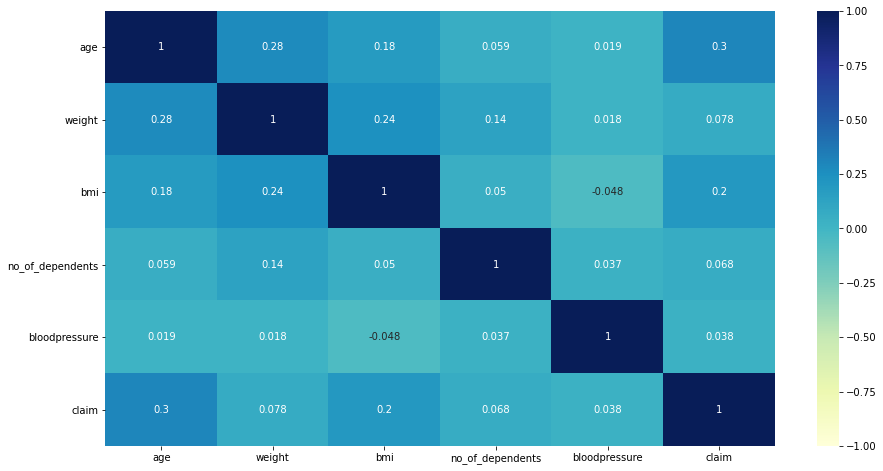

In [33]:
# Plot the above correlation matrix

# Set the figure size
plt.figure(figsize=(15, 8))

# plot the corr matrix
import seaborn as sns
sns.heatmap(corr, cmap="YlGnBu", vmax=1.0, vmin=-1.0, annot=True)
plt.show()

In [34]:
df_insurance['city'].value_counts()

NewOrleans    302
Nashville     302
Charleston    298
Brimingham    298
Memphis       297
             ... 
Warwick        69
Syracuse       69
York           69
Trenton        69
Baltimore      69
Name: city, Length: 91, dtype: int64

In [39]:
# Binning in ML - Grouping
# create a region column and combine the north-east cities
df_insurance['region'] = df_insurance['city'].replace(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo','AtlanticCity','Portland', 'Cambridge', 'Hartford', 
                                                       'Springfield', 'Syracuse', 'Baltimore', 'York', 'Trenton',
                                                       'Warwick', 'WashingtonDC', 'Providence', 'Harrisburg',
                                                       'Newport', 'Stamford', 'Worcester'],
                                                      'North-East')

In [40]:
# combine all the southern cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
                                                         'Louisville', 'Memphis', 'Nashville', 'NewOrleans',
                                                         'Raleigh', 'Houston', 'Georgia', 'Oklahoma', 'Orlando',
                                                         'Macon', 'Huntsville', 'Knoxville', 'Florence', 'Miami',
                                                         'Tampa', 'PanamaCity', 'Kingsport', 'Marshall'],
                                                         'Southern')

In [41]:
# combine all the mid-west cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['Mandan', 'Waterloo', 'IowaCity', 'Columbia',
                                                         'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
                                                         'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
                                                         'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 
                                                         'Canton', 'Columbus', 'Rochester', 'Minneapolis', 
                                                         'JeffersonCity', 'Escabana','Youngstown'],
                                                         'Mid-West')

In [42]:
# combine all the western cities into the 'region' column
df_insurance['region'] = df_insurance['region'].replace(['SantaRosa', 'Eureka', 'SanFrancisco', 'SanJose',
                                                         'LosAngeles', 'Oxnard', 'SanDeigo', 'Oceanside', 
                                                         'Carlsbad', 'Montrose', 'Prescott', 'Fresno', 'Reno',
                                                         'LasVegas', 'Tucson', 'SanLuis', 'Denver', 'Kingman',
                                                         'Bakersfield', 'Mexicali', 'SilverCity', 'Pheonix',
                                                         'SantaFe', 'Lovelock'],
                                                         'West')

In [43]:
df_insurance.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,region
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6,North-East
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0,North-East
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2,North-East
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6,North-East
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7,North-East


In [44]:
df_insurance['region'].value_counts()

Southern      4444
West          4273
North-East    3471
Mid-West      2812
Name: region, dtype: int64

In [45]:
# check the unique values of the region using 'unique()'
df_insurance['region'].unique()

array(['North-East', 'Southern', 'Mid-West', 'West'], dtype=object)

In [46]:
# drop the 'city' variable from the dataset using drop()
# axis=1: specifies that the column `city` is to be dropped
df_insurance = df_insurance.drop(['city'], axis=1)

In [ ]:
#Perform EDA using statistical techniques and visualization
#Perform outlier analysis
#Suggest if any outliers to be removed


In [47]:
# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_categoric_features = df_insurance.select_dtypes(include=[np.object])

# display categorical features
df_categoric_features.columns

Index(['sex', 'hereditary_diseases', 'smoker', 'diabetes', 'regular_ex',
       'job_title', 'region'],
      dtype='object')

In [53]:
# for all categoric variables create dummy variables
for col in df_categoric_features.columns.values:
    # for a feature create dummy variables using get_dummies()
    # prefix: specify the prefix before creating the dummy variable
    # "drop_first=True": creates 'n-1' dummy variables
    dummy_encoded_variables = pd.get_dummies(df_categoric_features[col], prefix=col, drop_first=True)
    # concatenate the categoric features with dummy variables using concat()
    # axis=1: specifies that the concatenation is column wise
    df_categoric_features = pd.concat([df_categoric_features, dummy_encoded_variables],axis=1)
    # drop the orginal categorical variable from the dataframe
    # axis=1: specifies that the column is to be dropped
    # inplace: makes permanent changes in the dataframe
    df_categoric_features.drop([col], axis=1, inplace=True)

In [54]:
df_categoric_features.head()

,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,...,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [55]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_insurance_dummy = pd.concat([df_numeric_features, df_categoric_features], axis=1)

# display data with dummy variables
df_insurance_dummy.head()

,age,weight,bmi,no_of_dependents,bloodpressure,claim,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,...,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West
0,60.0,64,24.3,1,72,13112.6,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,49.0,75,22.6,1,78,9567.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,32.0,64,17.8,2,88,32734.2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,61.0,53,36.4,1,72,48517.6,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,19.0,50,20.6,0,82,1731.7,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
# add the intercept column to the dataset
import statsmodels.api as sm
df_insurance_dummy = sm.add_constant(df_insurance_dummy)
df_insurance_dummy.head()

,const,age,weight,bmi,no_of_dependents,bloodpressure,claim,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,...,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West
0,1.0,60.0,64,24.3,1,72,13112.6,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1.0,49.0,75,22.6,1,78,9567.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,32.0,64,17.8,2,88,32734.2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,61.0,53,36.4,1,72,48517.6,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,19.0,50,20.6,0,82,1731.7,0,0,0,...,0,0,0,0,0,0,0,1,0,0
